In [121]:
import matplotlib.pyplot as plt
import numpy as np
import math
import skimage
import skimage.morphology as mp


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
ahh


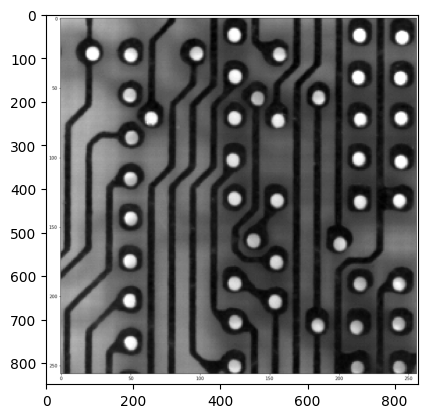

(849, 855)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


In [140]:
def  read(path):
    image = skimage.io.imread(path,as_gray = True)
    print(image)
    if np.issubdtype(image.dtype, np.float64):
        print("ahh")
        image = (image*255).astype(int)
    return image

image = read("./pcb_gray.png")
plt.imshow(image,cmap = 'gray')
plt.show()
print(image.shape)
print(image)

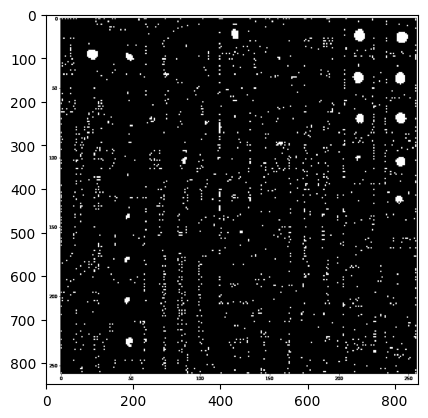

In [123]:


"""f: image"""
def localmaxima(f):
    M = (np.ones_like(f)*255).astype(int)
    shape = f.shape
    fifo = []
    for i in range(shape[0]):
        for j in range(shape[1]):
            neighbor = f[max(i-1,0):min(i+2,shape[0]), max(j-1,0):min(j+2,shape[1])]
            if( M[i,j] == 255 and np.amax(neighbor) > f[i,j]):
                M[i,j] = 0
                fifo.append([i,j])
                while(not fifo == []):
                    p =fifo.pop()
                    neighbor = f[max(p[0]-1,0):min(p[0]+2,shape[0]), max(p[1]-1,0):min(p[1]+2,shape[1])]
                    for i_n in range(neighbor.shape[0]):
                        for j_n in range(neighbor.shape[1]):
                            if(M[p[0]+i_n-1,p[1]+j_n-1] == 255 and neighbor[i_n,j_n] <=f[p[0],p[1]]):
                                M[p[0]+i_n-1,p[1]+j_n-1] = 0
                                fifo.append([p[0]+i_n-1,p[1]+j_n-1])
    return M
                            
            
                
            


AH = localmaxima(image)

plt.imshow(AH,cmap = 'gray')
plt.show()

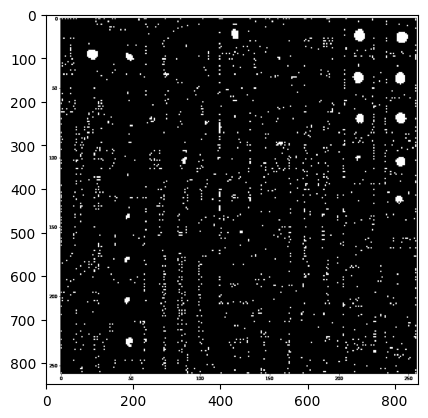

In [124]:
B = mp.local_maxima(image)
plt.imshow(B,cmap = 'gray')
plt.show()

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


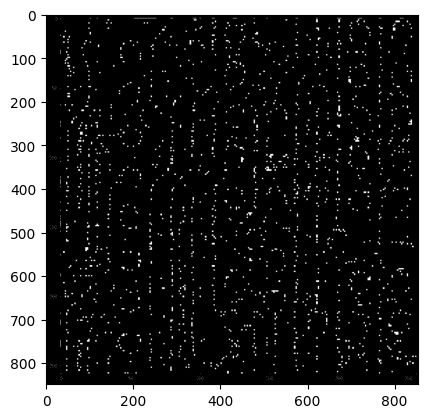

In [125]:
"""f: image"""
def localminima(f):
    M = (np.ones_like(f)*255).astype(int)
    shape = f.shape
    fifo = []
    for i in range(shape[0]):
        
        for j in range(shape[1]):
            
        
            neighboor = f[max(i-1,0):min(i+2,shape[0]), max(j-1,0):min(j+2,shape[1])]
            if( M[i,j] == 255 and np.amin(neighboor) < f[i,j]):
                M[i,j] = 0
                fifo.append([i,j])

                while(not fifo == []):
                    p =fifo.pop()
                    neighboor = f[max(p[0]-1,0):min(p[0]+2,shape[0]), max(p[1]-1,0):min(p[1]+2,shape[1])]
                    for i_n in range(neighboor.shape[0]):
                        for j_n in range(neighboor.shape[1]):
                            if(M[p[0]+i_n-1,p[1]+j_n-1] == 255 and neighboor[i_n,j_n] >=f[p[0],p[1]]):
                                M[p[0]+i_n-1,p[1]+j_n-1] = 0
                                fifo.append([p[0]+i_n-1,p[1]+j_n-1])
    return M
                            
            
                
            


AH = localminima(image)
print(AH)
plt.imshow(AH,cmap = 'gray')
plt.show()


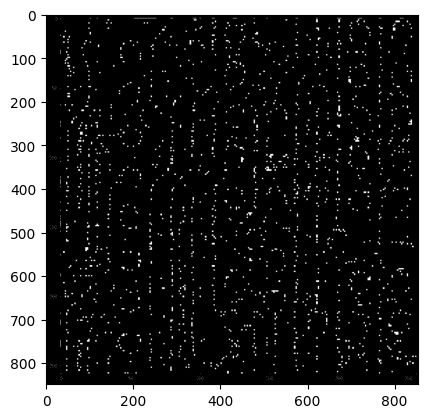

In [126]:
B = mp.local_minima(image)
plt.imshow(B,cmap = 'gray')
plt.show()

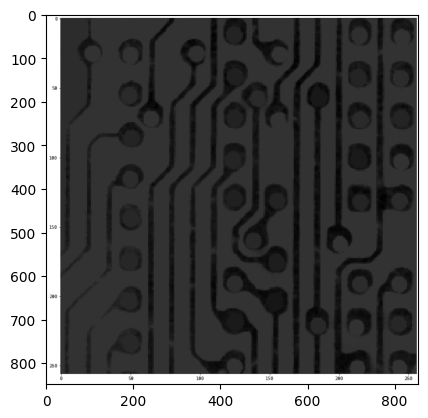

In [127]:
def neighborPlus(J,i,j):
    neighborGp = J[max(i-1,0):i, max(j-1,0):min(j+2,J.shape[1])].flatten()   #Première ligne        
    sl = J[i:i+1, max(j-1,0):j+1].flatten()
    neighborGp = np.append(neighborGp,sl)
    return neighborGp

def neighborMinus(J,i,j):
    neighborGn = J[i:i+1, j:min(j+2,J.shape[1])].flatten()
    sl =J[i+1:min(i+2,J.shape[0]), max(j-1,0):min(j+2,J.shape[1])].flatten()
    neighborGn = np.append(neighborGn,sl)
    return neighborGn



def reconstruction(I,Marker):
    J = Marker.copy()
    shape = J.shape
    fifo = []
    for i in range(shape[0]):
        for j in range(shape[1]):
            neighborGp = neighborPlus(J,i,j)
            J[i,j] = min((np.amax(neighborGp)) , I[i,j])
    

    
    
    for i in reversed(range(shape[0])):
        for j in reversed(range(shape[1])):
            neighborGn = neighborMinus(J,i,j)
            J[i,j] = min((np.amax(neighborGn)) , I[i,j])
            neighboorofp = neighborGn[1:5]
            for n in range(len(neighboorofp)):
                a = n+5
                if j == shape[1]-1 :
                    a+=1
                j_n = a%3
                i_n = int((a-j_n) / 3)

                
                if J[i-1+i_n,j-1+j_n]<J[i,j] :
                    if J[i-1+i_n,j-1+j_n]<I[i-1+i_n,j-1+j_n]:
                        fifo.append([i,j])
                        break

    while(not len(fifo)==0):
        p = fifo.pop()   
        neighbor = J[max(p[0]-1,0):min(p[0]+2,shape[0]), max(p[1]-1,0):min(p[1]+2,shape[1])]
        for i in range(neighbor.shape[0]):
            for j in range(neighbor.shape[1]):
                if J[p[0]-1+i,p[1]-1+j]<J[p[0],p[1]] and not J[p[0]-1+i,p[1]-1+j]==I[p[0]-1+i,p[1]-1+j]:
                    J[p[0]-1+i,p[1]-1+j] = min(J[p[0],p[1]],I[p[0]-1+i,p[1]-1+j])
                    fifo.append([i+p[0]-1,j+p[1]-1])
    return J


            
            



seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = reconstruction(mask,seed)
plt.imshow(dilated,cmap = 'gray')
plt.show()


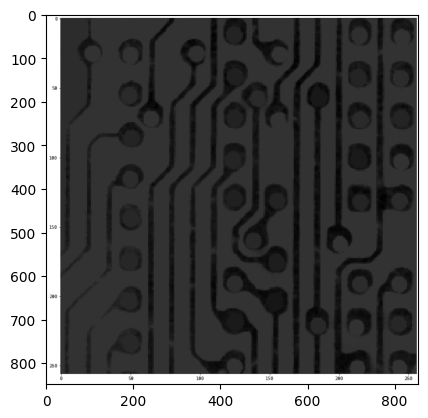

In [128]:

seed = np.copy(image)
seed[1:-1, 1:-1] = image.min()
mask = image

dilated = mp.reconstruction(seed, mask, method='dilation')
plt.imshow(dilated,cmap = 'gray')
plt.show()

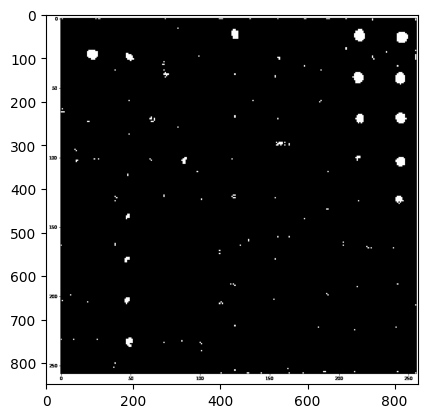

In [129]:
def hmax_filter(f,h):
    return mp.reconstruction(f-h,f)

def h_maxima(f,h):
    a= f-h
    #b[b<=0] = (b*0.0)[b<=0]
    reconstruction = mp.reconstruction(a,f)
    return ((f-reconstruction)>=h)
    
     
hmin = h_maxima(np.copy(image),15)
plt.imshow(hmin,cmap = 'gray')
plt.show()




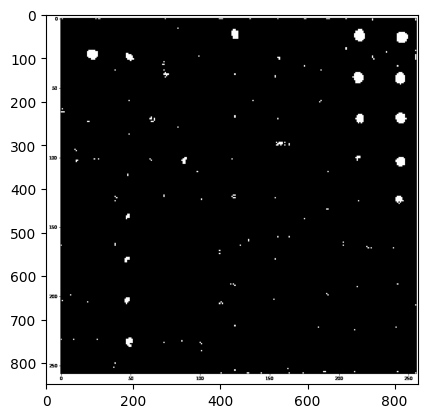

In [130]:


hminima = mp.h_maxima(image, 15)
plt.imshow(hminima,cmap = 'gray')
plt.show()

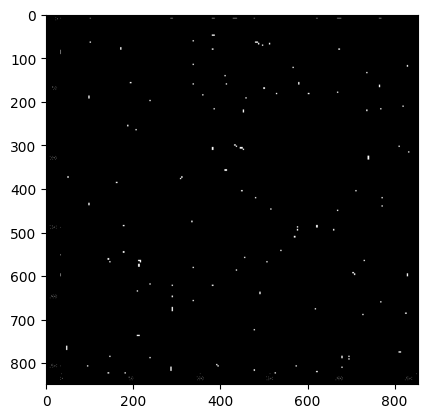

In [131]:
def hmin_filter(f,h):
    return mp.reconstruction(h+f,f,"erosion")

def h_minima(f,h):
    a= f+h
    #b[b<=0] = (b*0.0)[b<=0]
    reconstruction = mp.reconstruction(a,f,"erosion")
    return ((reconstruction-f)>=h)
    
     
hmin = h_minima(np.copy(image),15)
plt.imshow(hmin,cmap = 'gray')
plt.show()

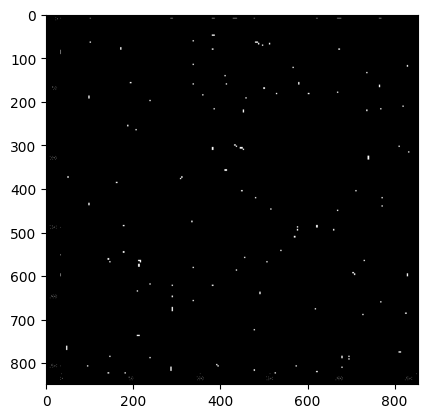

In [132]:

hminima = mp.h_minima(image, 15)
plt.imshow(hminima,cmap = 'gray')
plt.show()

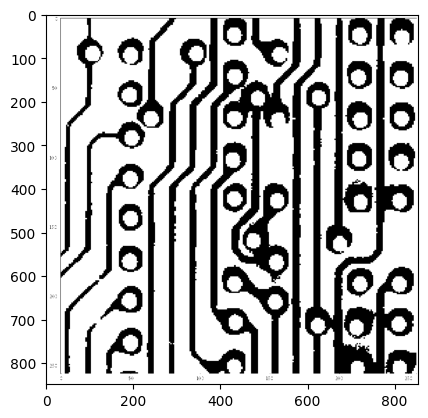

In [133]:
def hysterese(f,s1,s2):
    f1 = np.copy(f)
    f2 = np.copy(f)
    f1[s1>f] = 0
    f1[s1<=f] = 255
    f2[s2>f] = 0
    f2[s2<=f] = 255


    hysterese_img =mp.reconstruction(f2,f1)
    return hysterese_img


hystereseimg = hysterese(image,50,160)

plt.imshow(hystereseimg,cmap = 'gray')
plt.show()

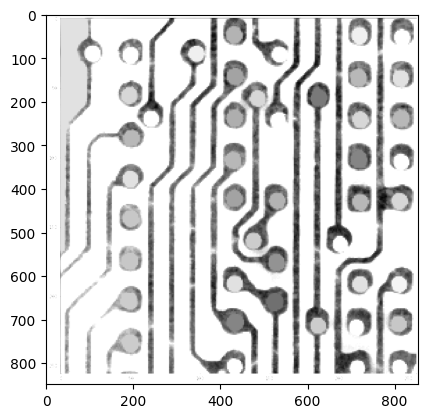

In [134]:
def ouverture_reconstruction(f,r):
    disk = mp.disk(r)
    f1 = mp.erosion(f,disk)
    return mp.reconstruction(f1,f)

img = ouverture_reconstruction(image,50)

plt.imshow(img,cmap = 'gray')
plt.show()



In [135]:
def  display(path,seuil1 = 50,seuil2=15,s3=50,s4=160,r =50):
    image = read(path)
    print(image)
    plt.subplot(1, 1, 1)
    plt.imshow(image,cmap = 'gray')
    plt.title("Image")
    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(localminima(image),cmap = 'gray')
    plt.title("local minima")
    plt.subplot(1, 2, 2)
    plt.imshow(mp.local_minima(image),cmap = 'gray')
    plt.title("local minima skimage")
    plt.show()


    plt.subplot(1, 2, 1)
    plt.imshow(localmaxima(image),cmap = 'gray')
    plt.title("local maxima")
    plt.subplot(1, 2, 2)
    plt.imshow(mp.local_maxima(image),cmap = 'gray')
    plt.title("local maxima skimage")
    plt.show()
    
    seed = np.copy(image)
    seed[1:-1, 1:-1] = image.min()
    mask = image

    plt.subplot(1, 2, 1)
    plt.imshow(reconstruction(mask,seed),cmap = 'gray')
    plt.title("reconstruction")
    plt.subplot(1, 2, 2)
    plt.imshow(mp.reconstruction(seed, mask, method='dilation'),cmap = 'gray')
    plt.title("reconstruction skimage")
    plt.show()

    #seuil1 =50
    #seuil2 =15
    plt.subplot(1, 2, 1)
    plt.imshow(hmin_filter(np.copy(image),seuil1),cmap = 'gray')
    plt.title("hmin_filter h="+str(seuil1))
    plt.subplot(1, 2, 2)
    plt.imshow(hmax_filter(np.copy(image), seuil2),cmap = 'gray')
    plt.title("hmax_filter h="+str(seuil2))
    plt.show()
    
    
    plt.subplot(1, 2, 1)
    plt.imshow(h_minima(np.copy(image),seuil1),cmap = 'gray')
    plt.title("h_minima h="+str(seuil1))
    plt.subplot(1, 2, 2)
    plt.imshow(mp.h_minima(image, seuil1),cmap = 'gray')
    plt.title("h_minima skimage h="+str(seuil1))
    plt.show()

    plt.subplot(1, 2, 1)
    plt.imshow(h_maxima(np.copy(image),seuil2),cmap = 'gray')
    plt.title("h_maxima h="+str(seuil2))
    plt.subplot(1, 2, 2)
    plt.imshow(mp.h_maxima(image, seuil2),cmap = 'gray')
    plt.title("h_maxima skimage h="+str(seuil2))
    plt.show()

    #s3 =  50
    #s4 = 160
    #r = 50
    plt.subplot(1, 2, 1)
    plt.imshow(hysterese(image,s3,s4),cmap = 'gray')
    plt.title("hysterese s1 ="+str(s3)+" s2="+str(s4))
    plt.subplot(1, 2, 2)
    plt.imshow(ouverture_reconstruction(image,r),cmap = 'gray')
    plt.title("ouverture_reconstruction radius="+str(50))
    plt.show()


[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
ahh
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


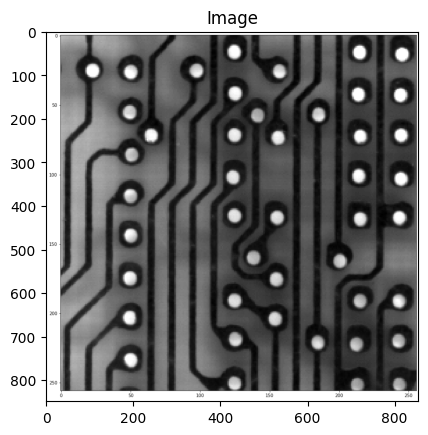

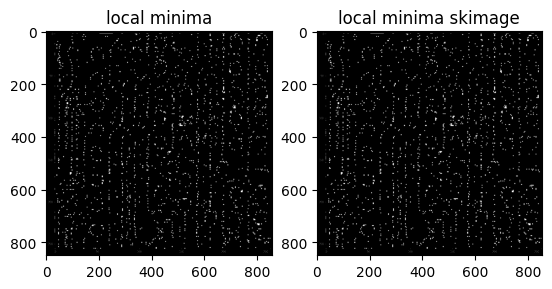

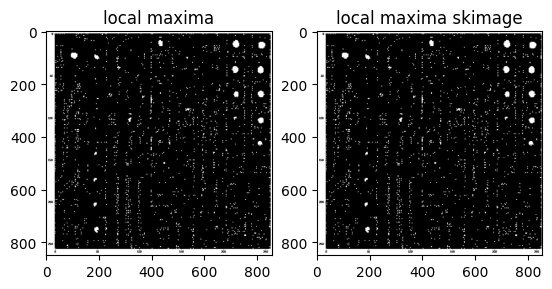

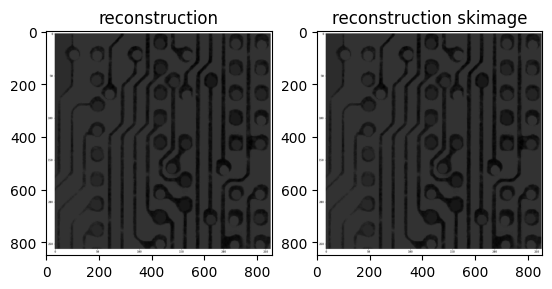

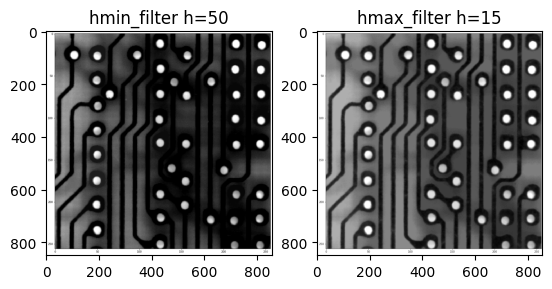

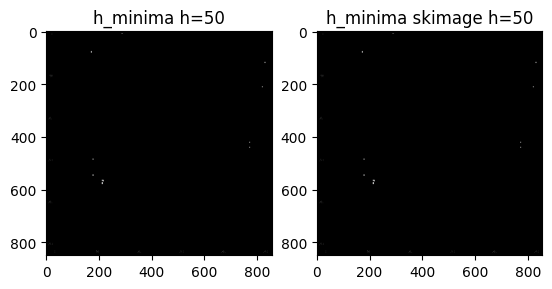

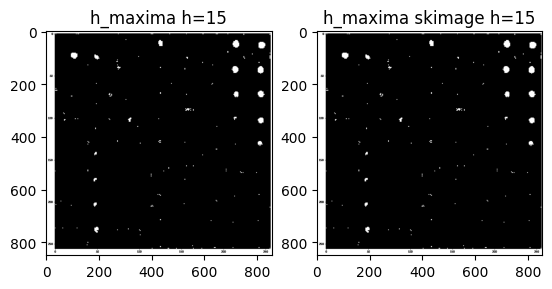

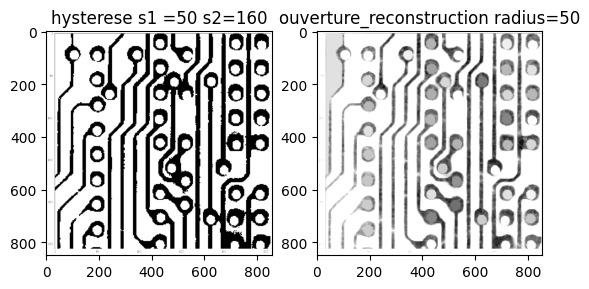

In [136]:
display("./pcb_gray.png",)

[[1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 ...
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]
 [1. 1. 1. ... 1. 1. 1.]]
ahh
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


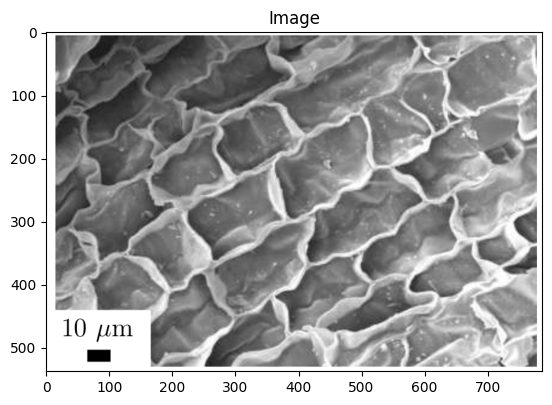

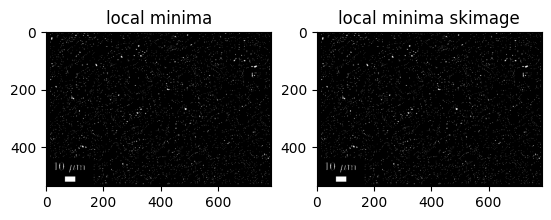

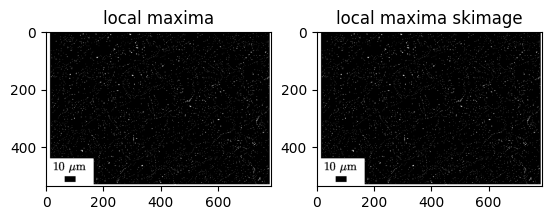

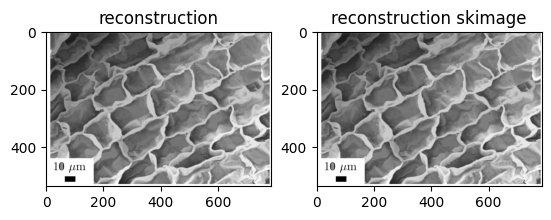

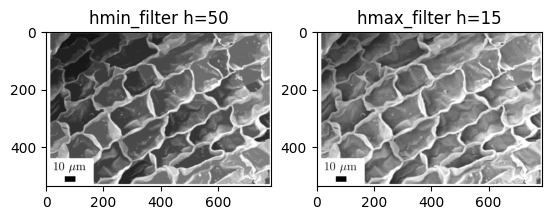

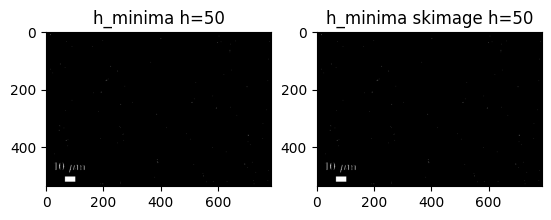

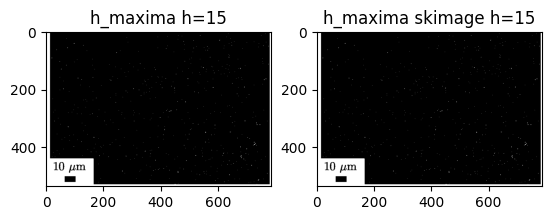

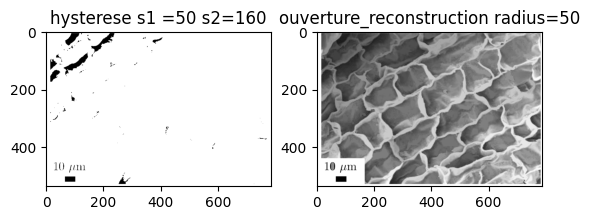

In [137]:
display("./cellule.png")

[[126  98  89 ...  75  79  86]
 [123 102  87 ...  73  75  79]
 [121 101  88 ...  71  80  83]
 ...
 [128 135 133 ... 121 119 119]
 [132 136 134 ... 120 120 119]
 [133 138 133 ... 120 120 120]]
[[126  98  89 ...  75  79  86]
 [123 102  87 ...  73  75  79]
 [121 101  88 ...  71  80  83]
 ...
 [128 135 133 ... 121 119 119]
 [132 136 134 ... 120 120 119]
 [133 138 133 ... 120 120 120]]


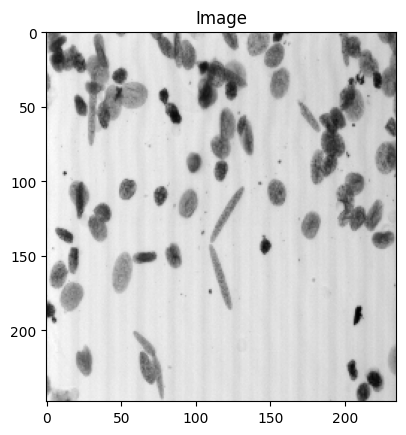

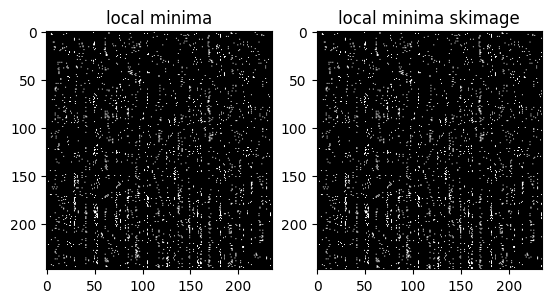

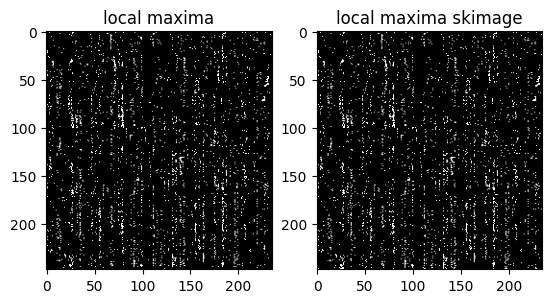

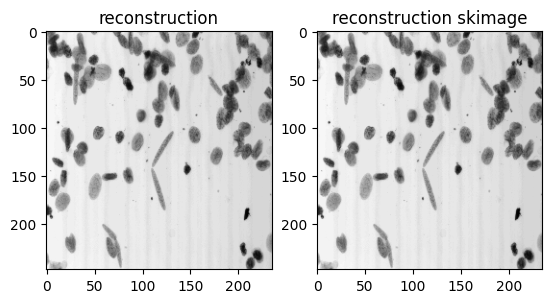

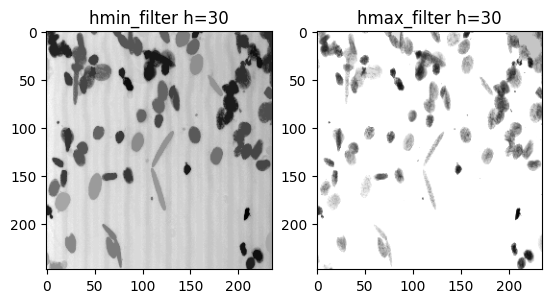

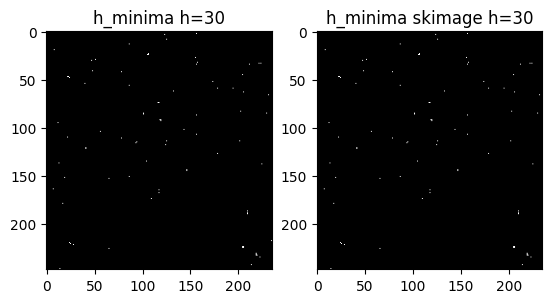

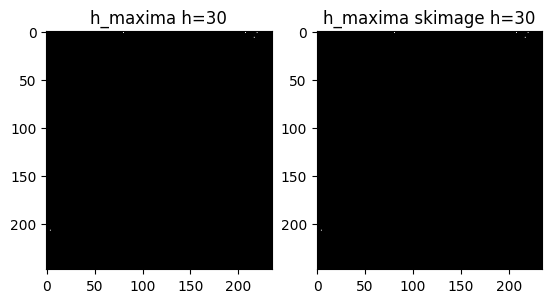

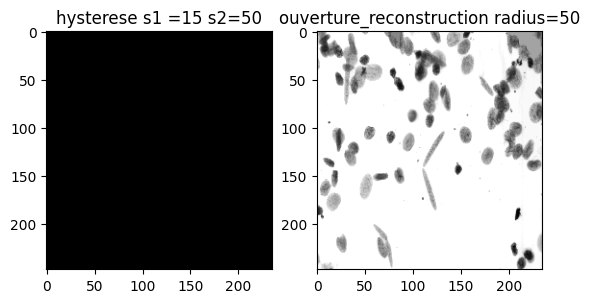

In [141]:
display("./esophagus.png",seuil1=30,seuil2=30,s3=15,s4=50)